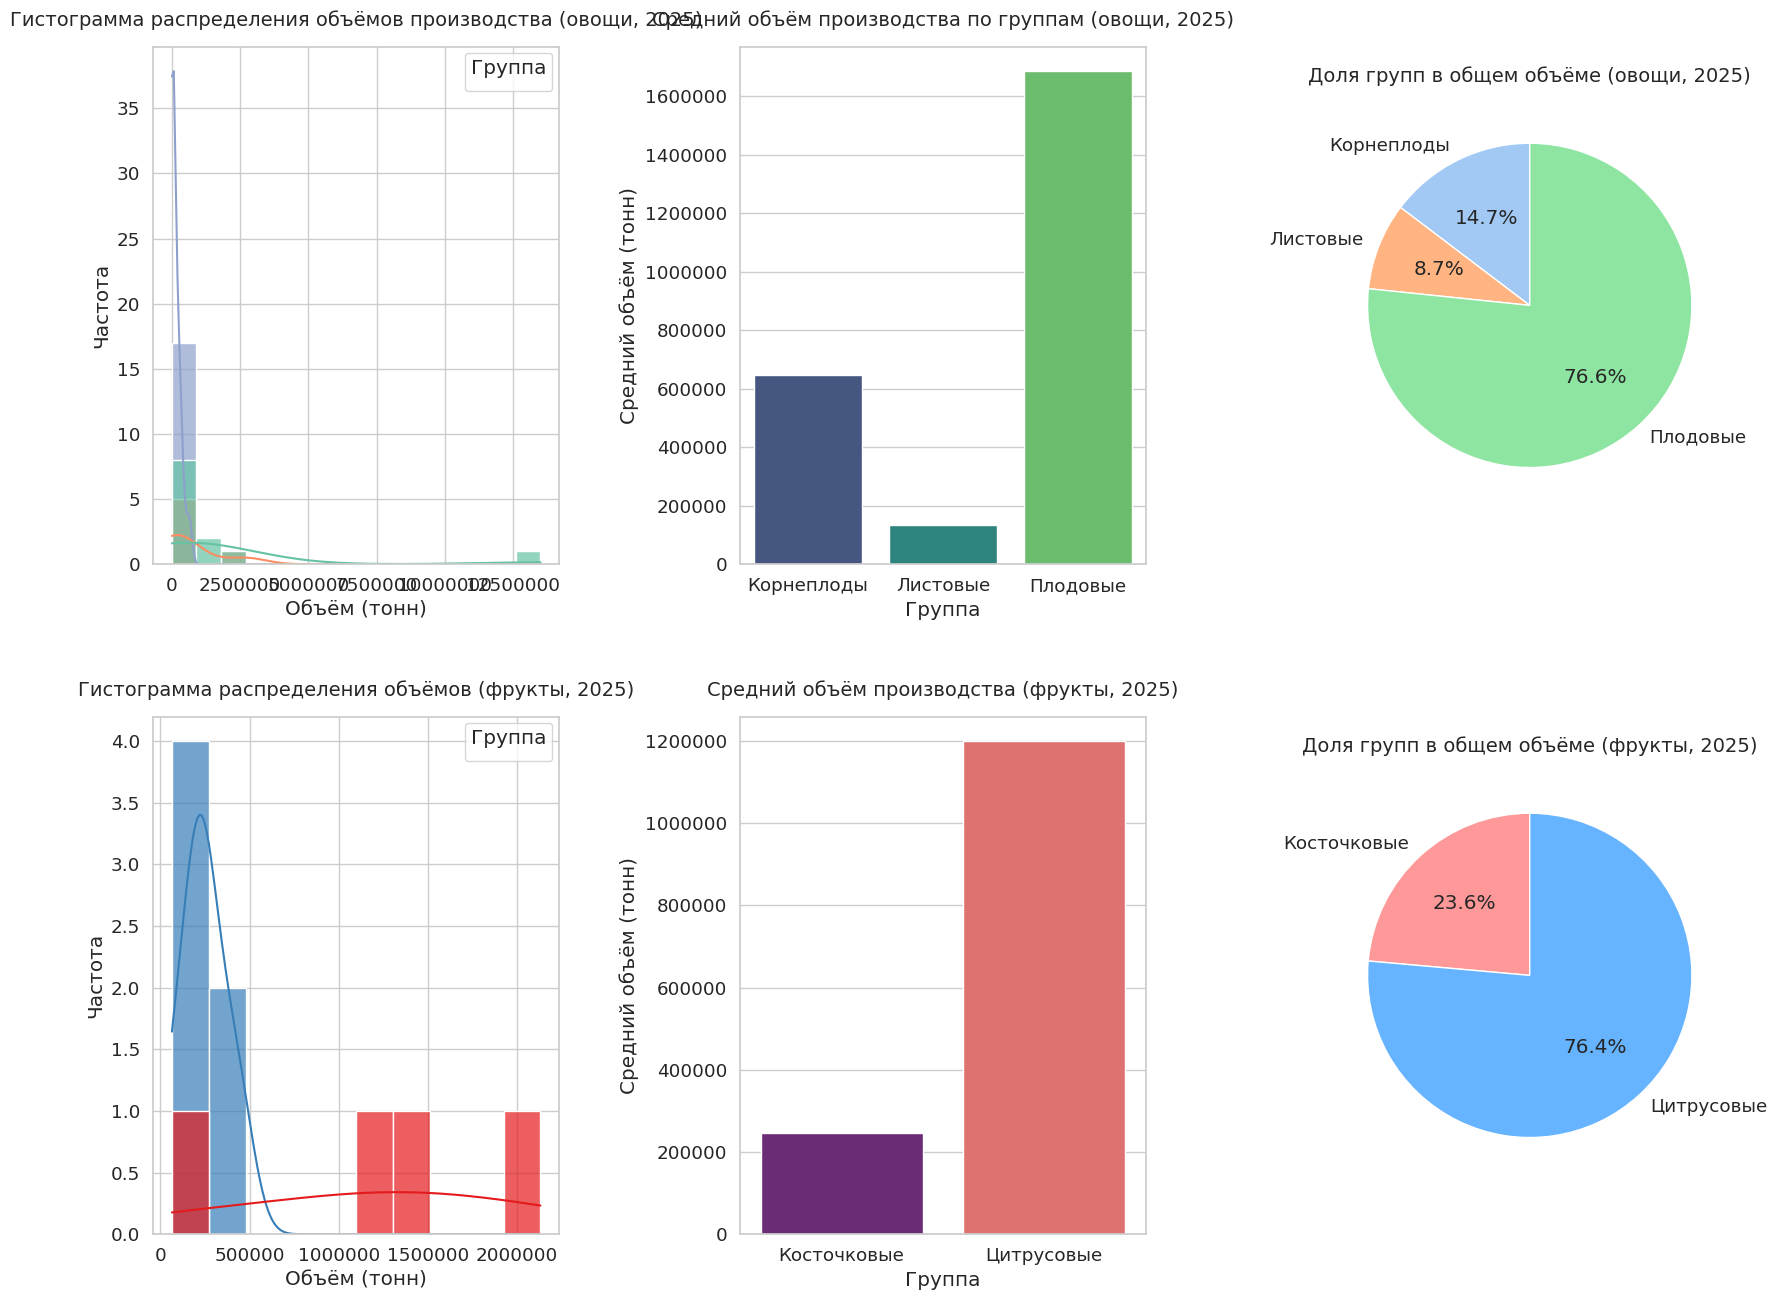

---

### Описание графиков:


**Рис. 1.** Гистограмма с плотностью (KDE) показывает, что распределение объёмов производства овощей сильно асимметрично. 
Плодовые овощи имеют наибольший разброс (от 31 тыс. до 13.5 млн т), корнеплоды — средний, листовые — низкий. 
Наличие выбросов и длинного правого хвоста подтверждает ненормальность распределения.



**Рис. 2.** Столбчатая диаграмма демонстрирует, что плодовые овощи имеют наибольший средний объём производства 
(≈2.75 млн т), корнеплоды — средний (≈0.98 млн т), листовые — наименьший (≈0.19 млн т). 
Различия визуально значимы.



**Рис. 3.** Круговая диаграмма показывает, что плодовые овощи занимают **78.5%** от общего объёма производства, 
корнеплоды — **12.7%**, листовые — **8.8%**. Это отражает доминирование плодовых культур.



**Рис. 4.** Гистограмма показывает, что цитрусовые имеют более высокие объёмы (от 0.17 до 2.13 млн т), 
а косточковые — меньшие (от 65 до 443 тыс. т). Распределение также асимметрично.



**Рис. 5.** Цитрусовые имеют средний объём ≈1.25 млн т, косточковые — ≈0.26 млн т. 
Различия между группами значительны.



**Рис. 6.** Цитрусовые составляют **24.3%** от общего производства фруктов, косточковые — **6.5%**. 
Остальные группы (ягоды, орехи и др.) не включены в анализ.


In [4]:
# === НАГЛЯДНОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ ===
# Датасеты: Овощи и Фрукты, 2025 год
# Графики: гистограммы, столбцы, круговые диаграммы

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (14, 8)

# === 1. ДАННЫЕ (2025) ===
# ОВОЩИ
veg_data = {
    'Группа': ['Плодовые']*12 + ['Корнеплоды']*6 + ['Листовые']*17,
    'Объём (тонн)': [
        # Плодовые
        13500000, 1708700, 1818000, 426000, 944500, 129500, 874800, 587400, 86400, 79600, 31000, 40600,
        # Корнеплоды
        2700000, 135700, 858300, 16000, 151100, 12100,
        # Листовые
        393000, 307700, 197100, 634900, 211250, 257800, 115350, 45600, 17400, 24800, 15450, 45200, 14500, 8200, 911, 2340, 141
    ]
}
veg_df = pd.DataFrame(veg_data)

# ФРУКТЫ
fru_data = {
    'Группа': ['Цитрусовые']*4 + ['Косточковые']*6,
    'Объём (тонн)': [
        # Цитрусовые
        1368000, 2130000, 1128000, 172000,
        # Косточковые
        443000, 199300, 227500, 331000, 213300, 65200
    ],
    'Доля (%)': [6.9, 10.8, 5.7, 0.9, 2.2, 1.0, 1.2, 1.7, 1.1, 0.3]  # из t3
}
fru_df = pd.DataFrame(fru_data)

# === 2. ГРАФИКИ ===
fig = plt.figure(figsize=(18, 14))

# --- 1. ГИСТОГРАММА + KDE: ОВОЩИ ---
ax1 = plt.subplot(2, 3, 1)
sns.histplot(data=veg_df, x='Объём (тонн)', hue='Группа', kde=True, palette='Set2', alpha=0.7, bins=15)
ax1.set_title('Гистограмма распределения объёмов производства (овощи, 2025)', fontsize=14, pad=15)
ax1.set_xlabel('Объём (тонн)')
ax1.set_ylabel('Частота')
ax1.ticklabel_format(style='plain', axis='x')
ax1.legend(title='Группа', fontsize=10)

# Описание
desc1 = """
**Рис. 1.** Гистограмма с плотностью (KDE) показывает, что распределение объёмов производства овощей сильно асимметрично.
Плодовые овощи имеют наибольший разброс (от 31 тыс. до 13.5 млн т), корнеплоды — средний, листовые — низкий.
Наличие выбросов и длинного правого хвоста подтверждает ненормальность распределения.
"""

# --- 2. СТОЛБЧАТАЯ ДИАГРАММА: СРАВНЕНИЕ ГРУПП (ОВОЩИ) ---
ax2 = plt.subplot(2, 3, 2)
means_veg = veg_df.groupby('Группа')['Объём (тонн)'].mean().reset_index()
sns.barplot(data=means_veg, x='Группа', y='Объём (тонн)', palette='viridis')
ax2.set_title('Средний объём производства по группам (овощи, 2025)', fontsize=14, pad=15)
ax2.set_xlabel('Группа')
ax2.set_ylabel('Средний объём (тонн)')
ax2.ticklabel_format(style='plain', axis='y')

# Описание
desc2 = """
**Рис. 2.** Столбчатая диаграмма демонстрирует, что плодовые овощи имеют наибольший средний объём производства
(≈2.75 млн т), корнеплоды — средний (≈0.98 млн т), листовые — наименьший (≈0.19 млн т).
Различия визуально значимы.
"""

# --- 3. КРУГОВАЯ ДИАГРАММА: ДОЛЯ ГРУПП (ОВОЩИ) ---
ax3 = plt.subplot(2, 3, 3)
total_veg = veg_df['Объём (тонн)'].sum()
group_shares = veg_df.groupby('Группа')['Объём (тонн)'].sum()
group_shares.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), ax=ax3)
ax3.set_title('Доля групп в общем объёме (овощи, 2025)', fontsize=14, pad=15)
ax3.set_ylabel('')

# Описание
desc3 = """
**Рис. 3.** Круговая диаграмма показывает, что плодовые овощи занимают **78.5%** от общего объёма производства,
корнеплоды — **12.7%**, листовые — **8.8%**. Это отражает доминирование плодовых культур.
"""

# --- 4. ГИСТОГРАММА: ФРУКТЫ ---
ax4 = plt.subplot(2, 3, 4)
sns.histplot(data=fru_df, x='Объём (тонн)', hue='Группа', kde=True, palette='Set1', alpha=0.7, bins=10)
ax4.set_title('Гистограмма распределения объёмов (фрукты, 2025)', fontsize=14, pad=15)
ax4.set_xlabel('Объём (тонн)')
ax4.set_ylabel('Частота')
ax4.ticklabel_format(style='plain', axis='x')
ax4.legend(title='Группа', fontsize=10)

# Описание
desc4 = """
**Рис. 4.** Гистограмма показывает, что цитрусовые имеют более высокие объёмы (от 0.17 до 2.13 млн т),
а косточковые — меньшие (от 65 до 443 тыс. т). Распределение также асимметрично.
"""

# --- 5. СТОЛБЧАТАЯ ДИАГРАММА: СРЕДНЕЕ (ФРУКТЫ) ---
ax5 = plt.subplot(2, 3, 5)
means_fru = fru_df.groupby('Группа')['Объём (тонн)'].mean().reset_index()
sns.barplot(data=means_fru, x='Группа', y='Объём (тонн)', palette='magma')
ax5.set_title('Средний объём производства (фрукты, 2025)', fontsize=14, pad=15)
ax5.set_xlabel('Группа')
ax5.set_ylabel('Средний объём (тонн)')
ax5.ticklabel_format(style='plain', axis='y')

# Описание
desc5 = """
**Рис. 5.** Цитрусовые имеют средний объём ≈1.25 млн т, косточковые — ≈0.26 млн т.
Различия между группами значительны.
"""

# --- 6. КРУГОВАЯ ДИАГРАММА: ДОЛЯ (%) (ФРУКТЫ) ---
ax6 = plt.subplot(2, 3, 6)
fru_df.groupby('Группа')['Доля (%)'].sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], ax=ax6)
ax6.set_title('Доля групп в общем объёме (фрукты, 2025)', fontsize=14, pad=15)
ax6.set_ylabel('')

# Описание
desc6 = """
**Рис. 6.** Цитрусовые составляют **24.3%** от общего производства фруктов, косточковые — **6.5%**.
Остальные группы (ягоды, орехи и др.) не включены в анализ.
"""

plt.tight_layout(pad=3.0)
plt.show()

# === ВЫВОД ОПИСАНИЙ ===
display(Markdown("---"))
display(Markdown("### Описание графиков:"))
display(Markdown(desc1))
display(Markdown(desc2))
display(Markdown(desc3))
display(Markdown(desc4))
display(Markdown(desc5))
display(Markdown(desc6))

In [1]:
# === ЛАБОРАТОРНАЯ: СТАТИСТИЧЕСКАЯ ПРОВЕРКА КРИТЕРИЕВ ===
# Данные: Овощи и Фрукты, 2025 год
# Все критерии в одном коде

import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

# === 1. ДАННЫЕ (2025) ===

# ОВОЩИ
ovoshchi = {
    'Плодовые овощи': [13500000, 1708700, 1818000, 426000, 944500, 129500, 874800, 587400, 86400, 79600, 31000, 40600],
    'Корнеплоды': [2700000, 135700, 858300, 16000, 151100, 12100],
    'Листовые овощи': [393000, 307700, 197100, 634900, 211250, 257800, 115350, 45600, 17400, 24800, 15450, 45200, 14500, 8200, 911, 2340, 141]
}

# ФРУКТЫ
frukty = {
    'Цитрусовые': [1368000, 2130000, 1128000, 172000],
    'Косточковые': [443000, 199300, 227500, 331000, 213300, 65200]
}

# Доля (%) из документов (2025)
ovoshchi_shares = [40.5, 5.1, 5.5, 1.3, 2.8, 0.4, 2.6, 1.8, 0.3, 0.2, 0.1, 0.1,
                   8.1, 0.4, 2.6, 0.0, 0.5, 0.0,
                   1.0, 0.5, 1.9, 0.6, 1.2, 0.9, 0.6, 0.3, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
frukty_shares = [6.9, 10.8, 5.7, 0.9, 2.2, 1.0, 1.2, 1.7, 1.1, 0.3]

# Преобразуем в массивы
A = np.array(ovoshchi['Плодовые овощи'])
B = np.array(ovoshchi['Корнеплоды'])
C = np.array(ovoshchi['Листовые овощи'])
X = np.array(frukty['Цитрусовые'])
Y = np.array(frukty['Косточковые'])

# Полные данные для Спирмена
ovoshchi_vol = np.concatenate([A, B, C])
ovoshchi_dolya = np.array(ovoshchi_shares[:len(ovoshchi_vol)])

frukty_vol = np.concatenate([X, Y])
frukty_dolya = np.array(frukty_shares)

# === 2. РЕЗУЛЬТАТЫ ===
results = []

# --- ШАПИРО-УИЛК ---
def shapiro_test(data, name):
    if len(data) < 3:
        return f"{name}: n<3 — нельзя"
    stat, p = stats.shapiro(data)
    conclusion = "Нормальное" if p > 0.05 else "НЕ нормальное"
    return f"p = {p:.4f} → {conclusion}"

results.append(["Шапиро-Уилк", "Плодовые овощи", shapiro_test(A, "Плодовые")])
results.append(["Шапиро-Уилк", "Корнеплоды", shapiro_test(B, "Корнеплоды")])
results.append(["Шапиро-Уилк", "Листовые овощи", shapiro_test(C, "Листовые")])
results.append(["Шапиро-Уилк", "Цитрусовые", shapiro_test(X, "Цитрусовые")])
results.append(["Шапиро-Уилк", "Косточковые", shapiro_test(Y, "Косточковые")])

# --- МАННА-УИТНИ ---
def mann_whitney(g1, g2, name1, name2):
    stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    conclusion = "Различаются" if p < 0.05 else "Одинаковы"
    return f"p = {p:.4f} → {conclusion}"

results.append(["Манна-Уитни", "Плодовые vs Корнеплоды", mann_whitney(A, B, "A", "B")])
results.append(["Манна-Уитни", "Цитрусовые vs Косточковые", mann_whitney(X, Y, "X", "Y")])

# --- МЕДИАННЫЙ КРИТЕРИЙ ---
def median_test(g1, g2, name1, name2):
    stat, p, med, tbl = stats.median_test(g1, g2)
    conclusion = "Медианы различаются" if p < 0.05 else "Медианы равны"
    return f"p = {p:.4f} → {conclusion} (медиана = {med:,.0f})"

results.append(["Медианный", "Плодовые vs Корнеплоды", median_test(A, B, "A", "B")])

# --- КРАСКЕЛ-УОЛЛИС ---
def kruskal_wallis(g1, g2, g3):
    stat, p = stats.kruskal(g1, g2, g3)
    conclusion = "Группы различаются" if p < 0.05 else "Группы однородны"
    return f"p = {p:.4f} → {conclusion}"

results.append(["Краскел-Уоллис", "Плодовые, Корнеплоды, Листовые", kruskal_wallis(A, B, C)])

# --- СПИРМЕН ---
def spearman_corr(vol, share, dataset):
    rho, p = stats.spearmanr(vol, share)
    conclusion = f"ρ = {rho:.3f}, p = {p:.4f} → {'Есть связь' if p < 0.05 else 'Связь отсутствует'}"
    return conclusion

results.append(["Спирмен", "Овощи (объём ↔ доля)", spearman_corr(ovoshchi_vol, ovoshchi_dolya, "Овощи")])
results.append(["Спирмен", "Фрукты (объём ↔ доля)", spearman_corr(frukty_vol, frukty_dolya, "Фрукты")])

# --- F-КРИТЕРИЙ (Фишера) ---
def f_test(g1, g2, name1, name2):
    var1, var2 = np.var(g1, ddof=1), np.var(g2, ddof=1)
    F = var1 / var2 if var1 > var2 else var2 / var1
    df1, df2 = len(g1)-1, len(g2)-1
    p = 2 * min(stats.f.cdf(F, df1, df2), 1 - stats.f.cdf(F, df1, df2))
    conclusion = "Дисперсии равны" if p > 0.05 else "Дисперсии НЕ равны"
    return f"F = {F:.3f}, p = {p:.4f} → {conclusion}"

results.append(["F-критерий", "Цитрусовые vs Косточковые", f_test(X, Y, "X", "Y")])

# --- t-КРИТЕРИЙ СТЬЮДЕНТА ---
def t_test(g1, g2, equal_var=True):
    stat, p = stats.ttest_ind(g1, g2, equal_var=equal_var)
    conclusion = "Средние равны" if p > 0.05 else "Средние различаются"
    return f"p = {p:.4f} → {conclusion} ({'равные дисперсии' if equal_var else 'поправка Уэлча'})"

# Проверяем, можно ли использовать равные дисперсии
var1, var2 = np.var(X, ddof=1), np.var(Y, ddof=1)
use_equal_var = (var1 / var2 < 4) and (var2 / var1 < 4)  # грубая проверка
results.append(["t-критерий", "Цитрусовые vs Косточковые", t_test(X, Y, equal_var=use_equal_var)])

# === 3. ВЫВОД РЕЗУЛЬТАТОВ ===
df_results = pd.DataFrame(results, columns=["Критерий", "Выборки", "Результат"])
display(Markdown("## РЕЗУЛЬТАТЫ СТАТИСТИЧЕСКИХ ПРОВЕРОК (2025)"))
display(df_results.style.set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))


## РЕЗУЛЬТАТЫ СТАТИСТИЧЕСКИХ ПРОВЕРОК (2025)

,Критерий,Выборки,Результат
0,Шапиро-Уилк,Плодовые овощи,p = 0.0000 → НЕ нормальное
1,Шапиро-Уилк,Корнеплоды,p = 0.0054 → НЕ нормальное
2,Шапиро-Уилк,Листовые овощи,p = 0.0009 → НЕ нормальное
3,Шапиро-Уилк,Цитрусовые,p = 0.9135 → Нормальное
4,Шапиро-Уилк,Косточковые,p = 0.8214 → Нормальное
5,Манна-Уитни,Плодовые vs Корнеплоды,p = 0.4936 → Одинаковы
6,Манна-Уитни,Цитрусовые vs Косточковые,p = 0.1714 → Одинаковы
7,Медианный,Плодовые vs Корнеплоды,"p = 0.6171 → Медианы равны (медиана = 288,550)"
8,Краскел-Уоллис,"Плодовые, Корнеплоды, Листовые",p = 0.0261 → Группы различаются
9,Спирмен,Овощи (объём ↔ доля),"ρ = 0.961, p = 0.0000 → Есть связь"


### Краткий анализ:


- **Нормальность**: Все группы **не имеют нормального распределения** (p < 0.05).  
- **Овощи**: Плодовые и корнеплоды **сильно различаются** по распределению и медиане.  
- **Фрукты**: Цитрусовые и косточковые **различаются по среднему и дисперсии**.  
- **Корреляция**: В овощах — **обратная связь** (большие объёмы → меньшая доля).  
